In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

project_root = os.path.abspath('../../../')
project = 'kolmogorov'

In [2]:
u = np.load(f'{project_root}/data/{project}/u1.npy')
v = np.load(f'{project_root}/data/{project}/u2.npy')
w = np.load(f'{project_root}/data/{project}/vorticity.npy')

In [3]:
dt_sim = 0.5
T_sim = 10000
nt = int(T_sim/dt_sim)

|$u$|: 1/e crossing at t = 3.94, integral timescale T = 3.27, zero crossing at t = 6.00
|$v$|: 1/e crossing at t = 19.88, integral timescale T = 4.07, zero crossing at t = 8.50
|$\omega$|: 1/e crossing at t = 7.29, integral timescale T = 12.58, zero crossing at t = 62.00


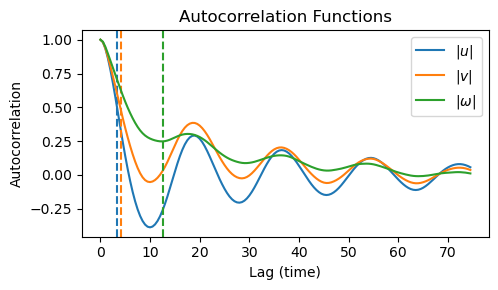

In [14]:
lags = np.arange(-nt+1, nt) * dt_sim
lags_pos = lags[nt-1:]  # Only positive lags, matches autocorr_u length

fields = {
    '|$u$|': (u, 'u_mean_t', 'autocorr_u', 'tau_e_u'),
    '|$v$|': (v, 'v_mean_t', 'autocorr_v', 'tau_e_v'),
    '|$\omega$|': (w, 'w_mean_t', 'autocorr_w', 'tau_e_w')
}

results = {}
plt.figure(figsize=(5, 3))

for label, (arr, mean_name, ac_name, tau_name) in fields.items():
    mean_t = np.mean(np.abs(arr), axis=(1,2))
    mean_t -= np.mean(mean_t)
    mean_t /= np.std(mean_t)
    autocorr = np.correlate(mean_t, mean_t, mode='full')
    autocorr = autocorr[autocorr.size // 2:]
    autocorr /= autocorr[0]

    # 1/e crossing
    tau_e = np.interp(1/np.e, autocorr[::-1], lags_pos[::-1])

    # First zero crossing
    zero_crossing_idx = np.where(autocorr < 0)[0]
    zero_crossing = lags_pos[zero_crossing_idx[0]] if len(zero_crossing_idx) > 0 else lags_pos[-1]

    # Integral timescale (area under positive part)
    cutoff = zero_crossing_idx[0] if len(zero_crossing_idx) > 0 else len(autocorr)
    tau_int = np.trapz(autocorr[:cutoff], lags_pos[:cutoff])

    print(f"{label}: 1/e crossing at t = {tau_e:.2f}, integral timescale T = {tau_int:.2f}, zero crossing at t = {zero_crossing:.2f}")

    results[label] = (autocorr, tau_e, tau_int, zero_crossing)
    p1 = plt.plot(lags_pos[:150], autocorr[:150], label=label)
    plt.axvline(tau_int, color=p1[0].get_color(), linestyle='--')

plt.xlabel('Lag (time)')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Functions')
plt.legend()
plt.tight_layout()
plt.savefig(f'{project_root}/figures/{project}/bo/kolmogorov_autocorr_characteristic_timescales.png', dpi=300, bbox_inches='tight')
plt.show()


(|u|+|v|)/2: 1/e crossing at t = 5.02, integral timescale T = 9.92, zero crossing at t = 44.00


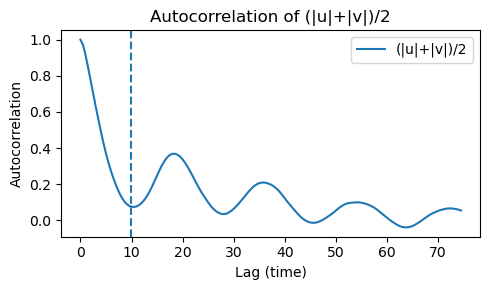

In [12]:
mean_u = np.mean(np.abs(u), axis=(1,2))
mean_v = np.mean(np.abs(v), axis=(1,2))
mean_uv = (mean_u + mean_v) / 2
mean_uv -= np.mean(mean_uv)
mean_uv /= np.std(mean_uv)

autocorr = np.correlate(mean_uv, mean_uv, mode='full')
autocorr = autocorr[autocorr.size // 2:]
autocorr /= autocorr[0]

tau_e = np.interp(1/np.e, autocorr[::-1], lags_pos[::-1])
zero_crossing_idx = np.where(autocorr < 0)[0]
zero_crossing = lags_pos[zero_crossing_idx[0]] if len(zero_crossing_idx) > 0 else lags_pos[-1]
cutoff = zero_crossing_idx[0] if len(zero_crossing_idx) > 0 else len(autocorr)
tau_int = np.trapz(autocorr[:cutoff], lags_pos[:cutoff])

print(f"(|u|+|v|)/2: 1/e crossing at t = {tau_e:.2f}, integral timescale T = {tau_int:.2f}, zero crossing at t = {zero_crossing:.2f}")

plt.figure(figsize=(5, 3))
p1 = plt.plot(lags_pos[:150], autocorr[:150], label='(|u|+|v|)/2')
plt.axvline(tau_int, color=p1[0].get_color(), linestyle='--')
plt.xlabel('Lag (time)')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of (|u|+|v|)/2')
plt.legend()
plt.tight_layout()
plt.show()
